In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('./airline_passengers.csv',index_col=0)
dates = pd.date_range('1949-01-01','1960-12-01',freq='MS')
df['Date'] = dates
df.set_index('Date', inplace=True)

In [4]:
df

,Thousands of Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
#dataset.index.freq = 'MS'
train, test = df.iloc[:131, 0], df.iloc[131:, 0]

In [7]:
model = ExponentialSmoothing(train, 
                             trend='add', 
                             damped=False, 
                             seasonal='add', 
                             seasonal_periods=12).fit()

In [8]:
model

In [9]:
holt_pred = model.predict(start=test.index[0], end=test.index[-1])

In [16]:
holt_pred = model.predict(start=test.index[0], end=300)

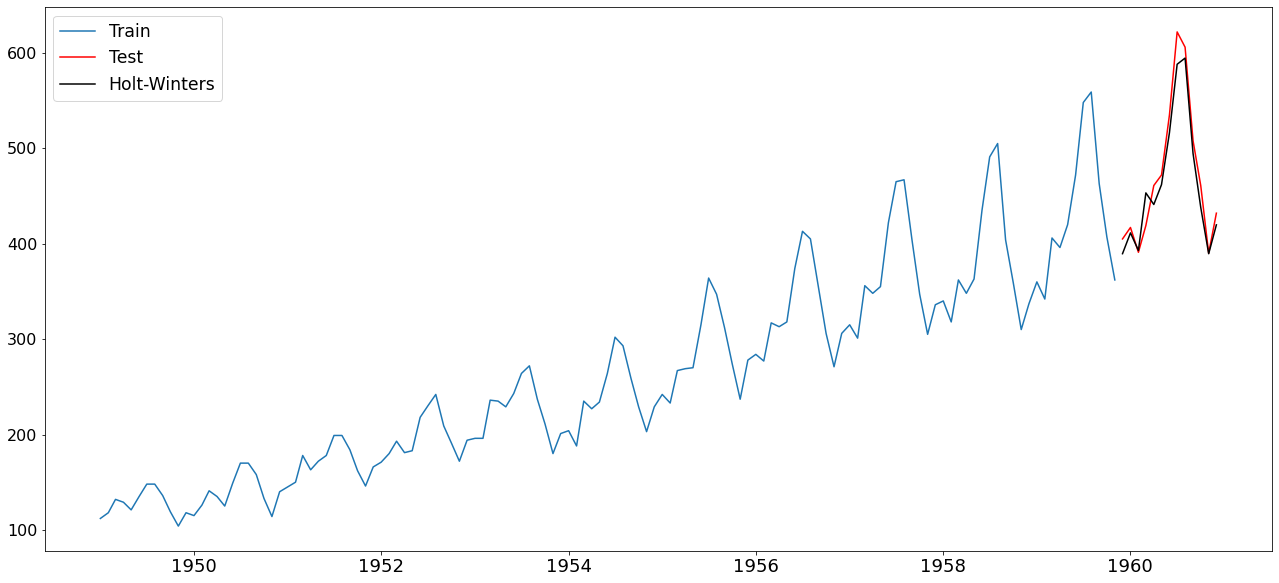

In [10]:
plt.figure(figsize=(22, 10))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='r')
plt.plot(holt_pred.index, holt_pred, label='Holt-Winters', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()